In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('datasets/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [82]:
df.shape

(200000, 9)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# Pre-Processing

In [84]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [85]:
df.dropna(axis=0, inplace=True)

In [86]:
df.isnull().sum().sum()

0

In [87]:
# Dropping redundant columns
df.drop(columns=['Unnamed: 0','key'], axis=1, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [89]:
# Converting object date to integer date

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).astype(int) / 10**9
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,1.431028e+09,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,1.247861e+09,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,1.251150e+09,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,1.246005e+09,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,1.409248e+09,-73.925023,40.744085,-73.973082,40.761247,5


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  float64
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 12.2 MB


# Handling Outliers

In [91]:
# Longitude ranges from 0 deg to 180 deg
# Latitude ranges from 0 deg to 90 deg

# Handling outliers in longitudes and latitudes

df = df[
    (df['pickup_latitude'] <= 90) & (df['dropoff_latitude'] <= 90) & 
    (df['pickup_latitude'] >= -90) & (df['dropoff_latitude'] >= -90) &
    (df['pickup_longitude'] <= 180) & (df['dropoff_longitude'] <= 180) &
    (df['pickup_longitude'] >= -180) & (df['dropoff_longitude'] >= -180)
]

df.shape

(199987, 7)

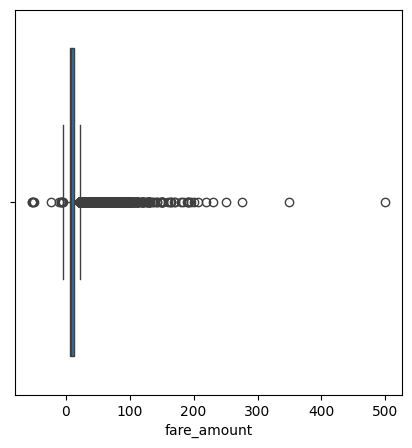

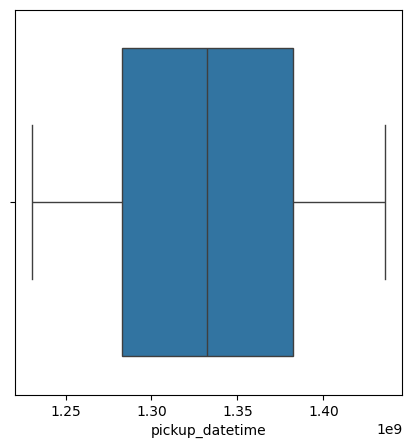

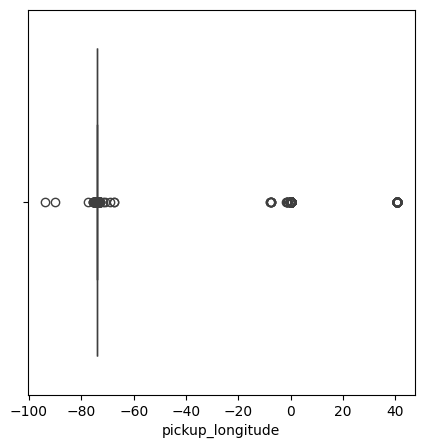

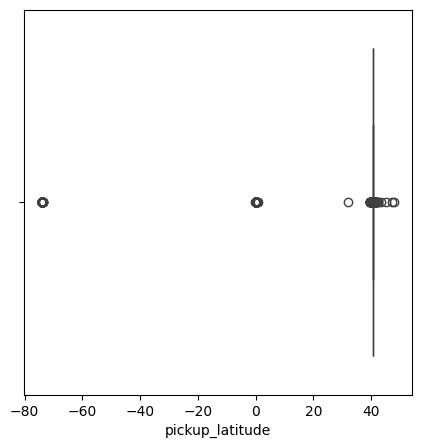

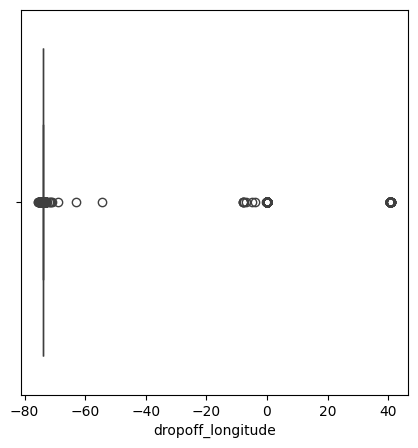

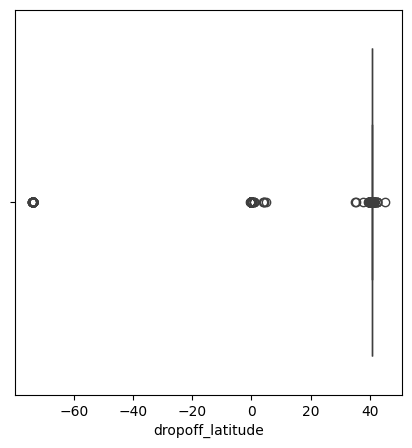

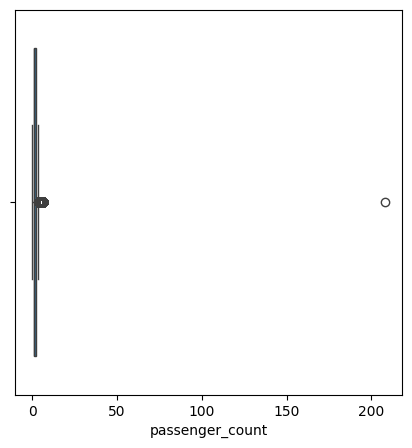

In [92]:
def plot_boxplot(col):
    plt.figure(figsize=(5,5))
    sns.boxplot(x=col)
    
for col in df.columns:
    plot_boxplot(df[col])

In [22]:
high = np.percentile(df['fare_amount'],99)
low = np.percentile(df['fare_amount'],1)

# df = df[(df['fare_amount'] >= low) & (df['fare_amount'] <= high)]

# Correlation b/w columns

In [23]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,1.431028e+09,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,1.247861e+09,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,1.251150e+09,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,1.246005e+09,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,1.409248e+09,-73.925023,40.744085,-73.973082,40.761247,5


In [65]:
X = df.iloc[:,1:]
X

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,1.431028e+09,-73.999817,40.738354,-73.999512,40.723217,1
1,1.247861e+09,-73.994355,40.728225,-73.994710,40.750325,1
2,1.251150e+09,-74.005043,40.740770,-73.962565,40.772647,1
3,1.246005e+09,-73.976124,40.790844,-73.965316,40.803349,3
4,1.409248e+09,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,1.351421e+09,-73.987042,40.739367,-73.986525,40.740297,1
199996,1.394759e+09,-73.984722,40.736837,-74.006672,40.739620,1
199997,1.246236e+09,-73.986017,40.756487,-73.858957,40.692588,2
199998,1.432134e+09,-73.997124,40.725452,-73.983215,40.695415,1


In [66]:
y = df.iloc[:,0]
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199987, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [68]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(159989, 6)

(39998, 6)

(159989,)

(39998,)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 0.86347276, -0.14204815,  0.13400683, -0.14019779,  0.13522314,
         0.93714899],
       [ 1.70641258, -0.14349633,  0.13388381, -0.13899487,  0.13774771,
        -0.48734347],
       [-1.40527549, -0.14123996,  0.13753404, -0.14170338,  0.13585496,
        -0.48734347],
       ...,
       [ 1.21110548, -0.14153255,  0.13752592, -0.14343275,  0.12992492,
        -0.48734347],
       [-0.14718751, -0.1402237 ,  0.14281958, -0.13906715,  0.14503415,
        -0.48734347],
       [-1.29518372, -0.1424108 ,  0.13482552, -0.14222666,  0.13421616,
        -0.48734347]])

<Axes: >

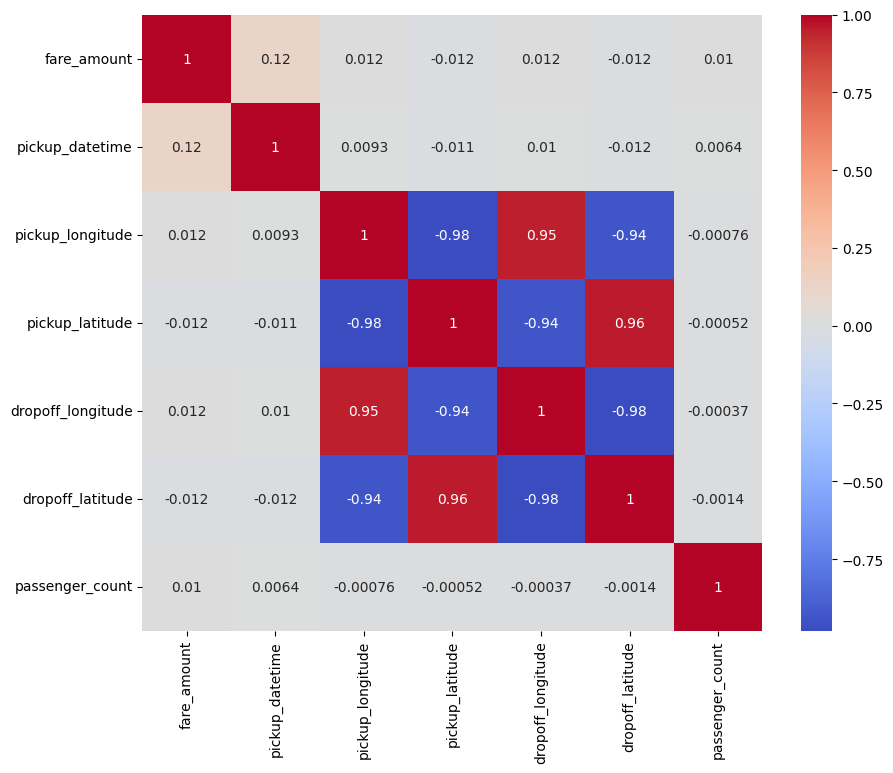

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [71]:
X.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,1.431028e+09,-73.999817,40.738354,-73.999512,40.723217,1
1,1.247861e+09,-73.994355,40.728225,-73.994710,40.750325,1
2,1.251150e+09,-74.005043,40.740770,-73.962565,40.772647,1
3,1.246005e+09,-73.976124,40.790844,-73.965316,40.803349,3
4,1.409248e+09,-73.925023,40.744085,-73.973082,40.761247,5


# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [73]:
reg.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = reg.predict(X_test)
y_pred

array([12.50637212, 12.79933216, 11.09549713, ..., 12.04312574,
       12.88318874, 13.42366422])

In [75]:
y_test

49815      6.0
187947     9.0
162679     4.9
21965      6.0
47188     32.5
          ... 
186858     7.7
193126    19.0
183789     9.5
147202     4.5
39270      5.5
Name: fare_amount, Length: 39998, dtype: float64

In [76]:
from sklearn import metrics

print("R2 Score: ", metrics.r2_score(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 Score:  0.015863356864718958
RMSE:  9.714608086888893


In [60]:
X_train.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=12, random_state=2)


In [78]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=12, random_state=2)

In [79]:
y_pred = regressor.predict(X_test)

In [80]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  2.1107742262113107
Mean Squared Error:  22.604723810999577
RMSE:  4.754442534198891
R2 Score:  0.7642758717832334
